In [24]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [25]:
import pandas as pd 
import numpy as np 
from datetime import datetime
import matplotlib.pyplot as plt


In [37]:
day = pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [39]:
day.drop(['instant', 'dteday'], axis=1, inplace=True)

In [40]:
day.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [41]:
day.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
from sklearn.linear_model import LinearRegression 


<div class="burk">
Step 2: Visualising the Data

</div><i class="fa fa-lightbulb-o "></i>

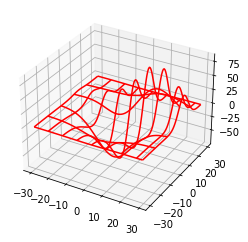

In [15]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


chart = plt.figure()
chart3d = chart.add_subplot(111, projection='3d')

# Create some test data.
temp, hum, casual = axes3d.get_test_data(0.08)

# Plot a wireframe.
chart3d.plot_wireframe(temp, hum, casual, color='r',rstride=15, cstride=10)

plt.show()
 

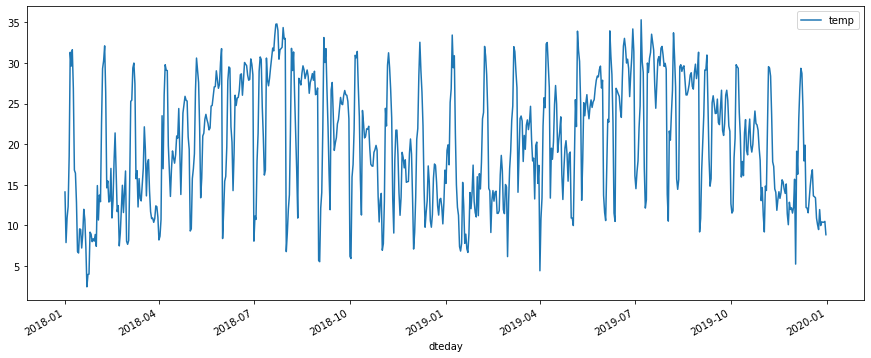

In [16]:
df = pd.DataFrame(day, columns = ['dteday', 'temp'])

# Set the Date as Index
df['dteday'] = pd.to_datetime(df['dteday'])
df.index = df['dteday']
del df['dteday']


df.plot(figsize=(15, 6))
plt.show()

Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

Data Preparation:
You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 
 
Model Building
In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.

Model Evaluation:
When you're done with model building and residual analysis and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared score on the test set.
 
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
 
where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set.
Please don't forget to perform this step as the R-squared score on the test set holds some marks. The variable names inside the 'r2_score' function can be different based on the variable names you have chosen.